In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
df = pd.read_csv("glass_labelled.csv")

In [4]:
df2 = pd.read_csv("glass_unlabelled.csv")

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [7]:
df_new = df2.drop(["RI"],axis = 1)

In [8]:
from sklearn.cluster import KMeans

km = KMeans()

wcss = []

for k in range(1,12):
    km = KMeans(n_clusters = k)
    km.fit(df_new) 
    wcss.append(km.inertia_)

C:\Users\katel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


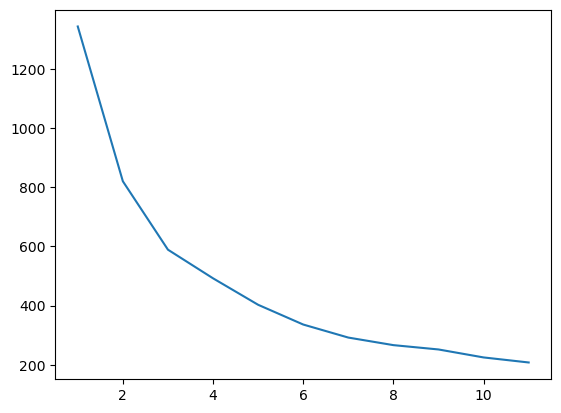

In [9]:
plt.plot(range(1,12),wcss)

In [ ]:
# I think that the ideal number of clusters would be 3 based on the graph.  This is
# because the elbow is located at 3.  This is very similar to the shape that we found in our
# hands on example.

In [10]:
km = KMeans(n_clusters = 3)
km.fit(df_new)

KMeans(n_clusters=3)

In [11]:
centers = km.cluster_centers_
centers

array([[1.32800617e+01, 3.45018519e+00, 1.33364198e+00, 7.25923457e+01,
        5.11049383e-01, 8.59290123e+00, 4.30246914e-02, 6.36419753e-02],
       [1.28452381e+01, 4.49047619e-01, 1.30523810e+00, 7.24052381e+01,
        2.54285714e-01, 1.23833333e+01, 1.50000000e-01, 7.14285714e-02],
       [1.44567742e+01, 1.97741935e-01, 2.12096774e+00, 7.31235484e+01,
        5.88387097e-01, 8.53838710e+00, 8.81935484e-01, 1.25806452e-02]])

In [12]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df["pred_labels"] = km.labels_

In [18]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred_labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [ ]:
# In the actual data there are 7 different types of glass (even though one is not covered in 
# this dataset) and the k means clustering model only has 3 predicted types of glass.

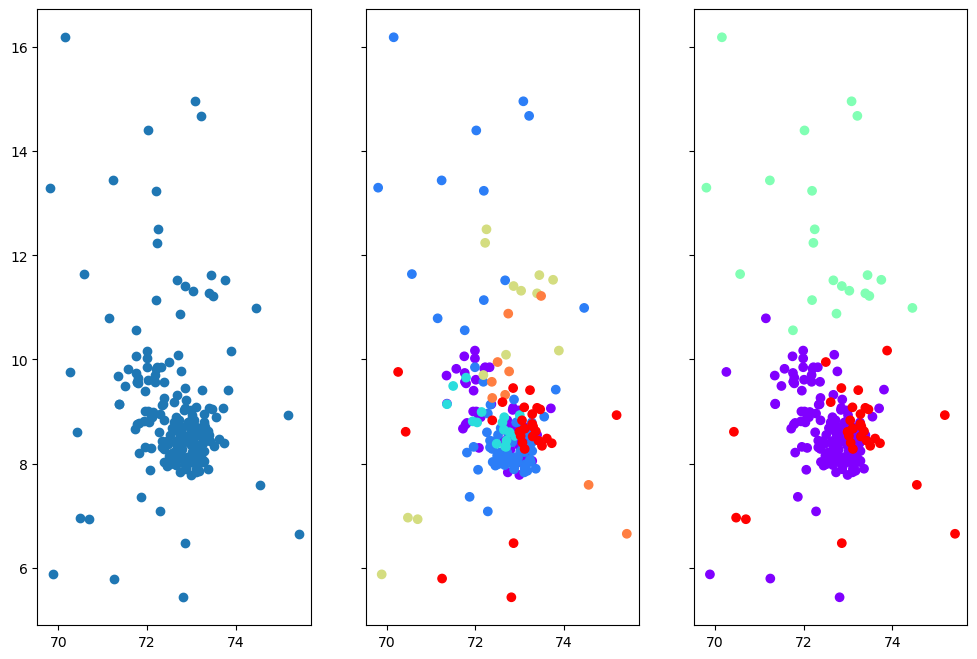

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows =1,ncols = 3, sharey = True, figsize = (12,8))
ax1.scatter(x = df["Si"], y = df["Ca"])
ax2.scatter(x = df["Si"], y = df["Ca"],c = df["Type"], cmap ="rainbow")
ax3.scatter(x = df["Si"], y = df["Ca"],c = df["pred_labels"], cmap ="rainbow")

In [ ]:
# I think that the clusters do a pretty good job of pulling data points close together
# to the same color.  

C:\Users\katel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

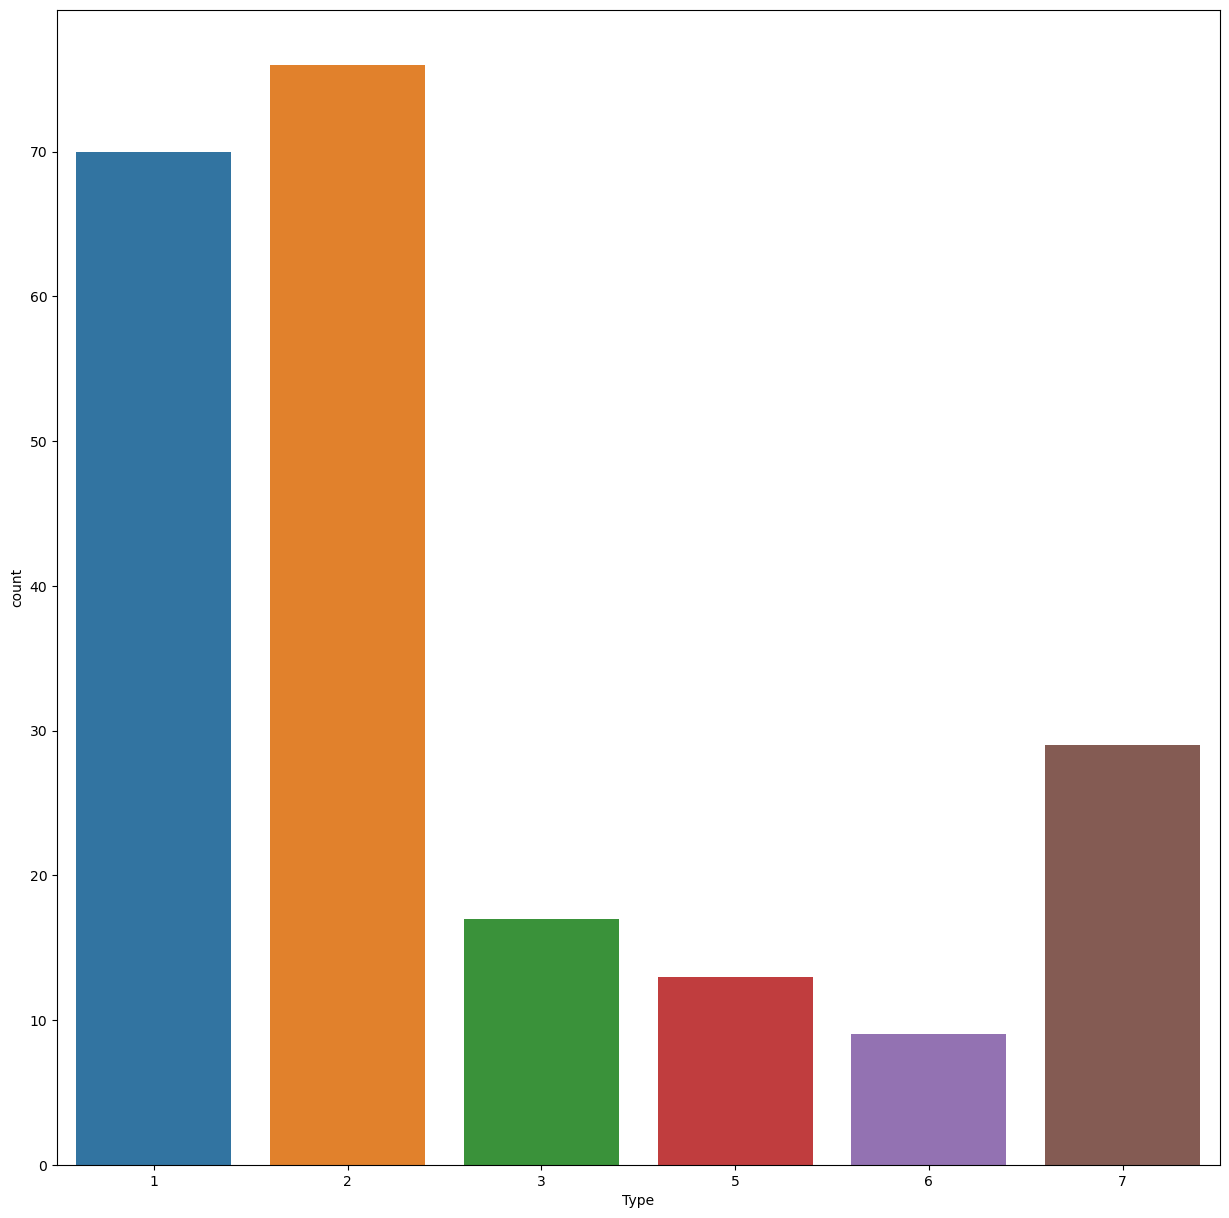

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(df["Type"])

In [ ]:
# The type of glass that is missing is vehicle windows (non-float processed).  There are not any in this dataset
# There is a very unevenly distributed data in this dataset.  Type 1 and 2 are used far more than 
# all of the other types like 6 or 5.  It is imbalancced.

<AxesSubplot:>

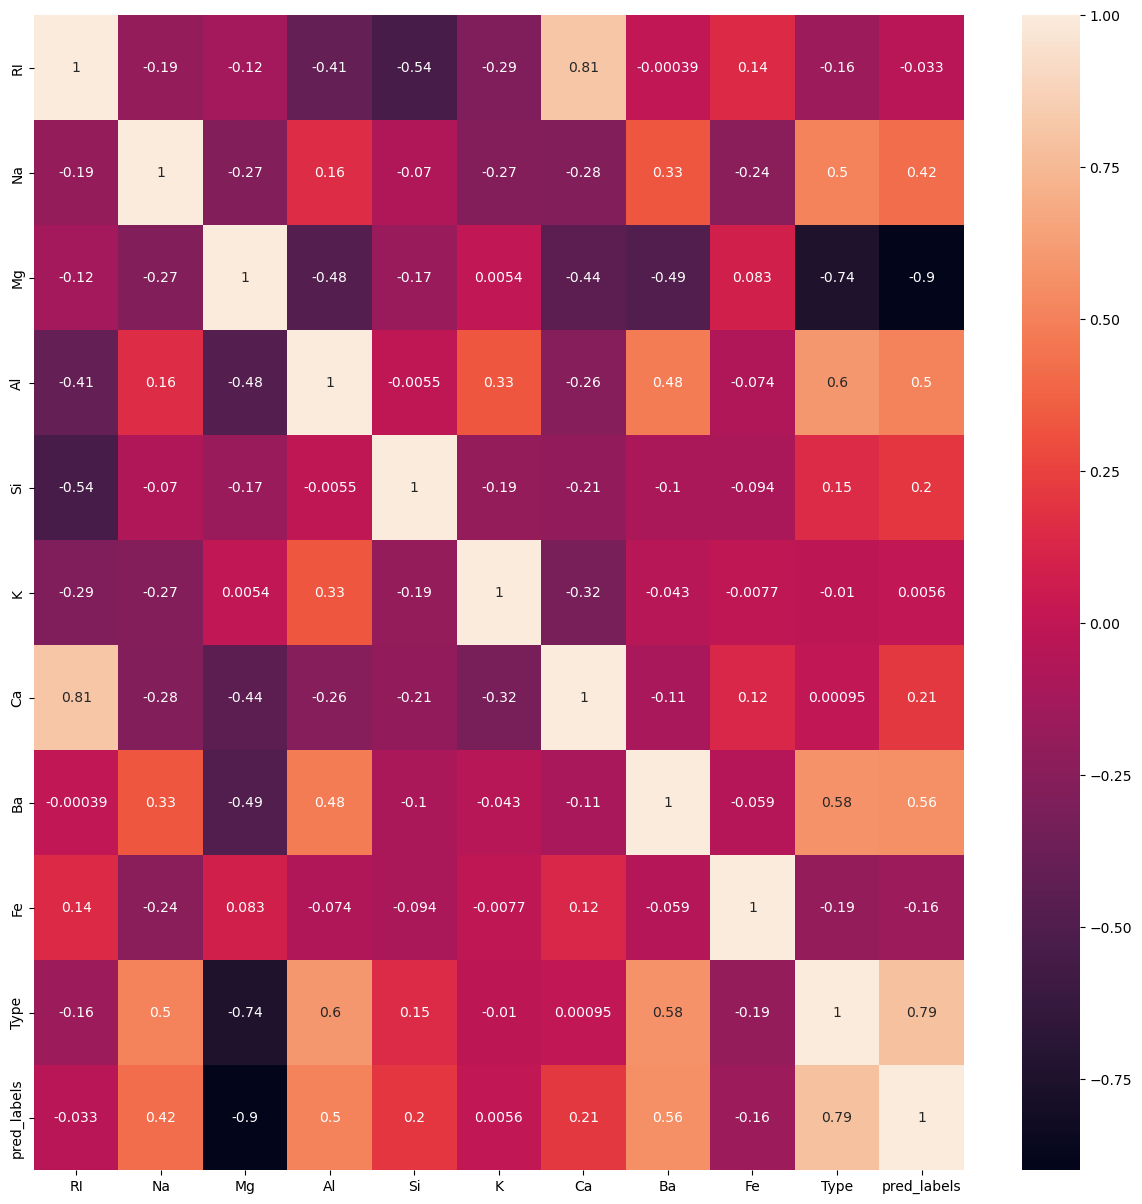

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# There is a 0.79 correlation between type and the predicted labels.  So the model does an okay job
# considering it doesn't have all of the types of glass.  The next highest correlation with the type of glass
# is the Mg level.  The predicted labels and Mg have an even higher correlation of 0.9.  The next most correlated
# with the Type is Al, then Ba.

<function matplotlib.pyplot.show(close=None, block=None)>

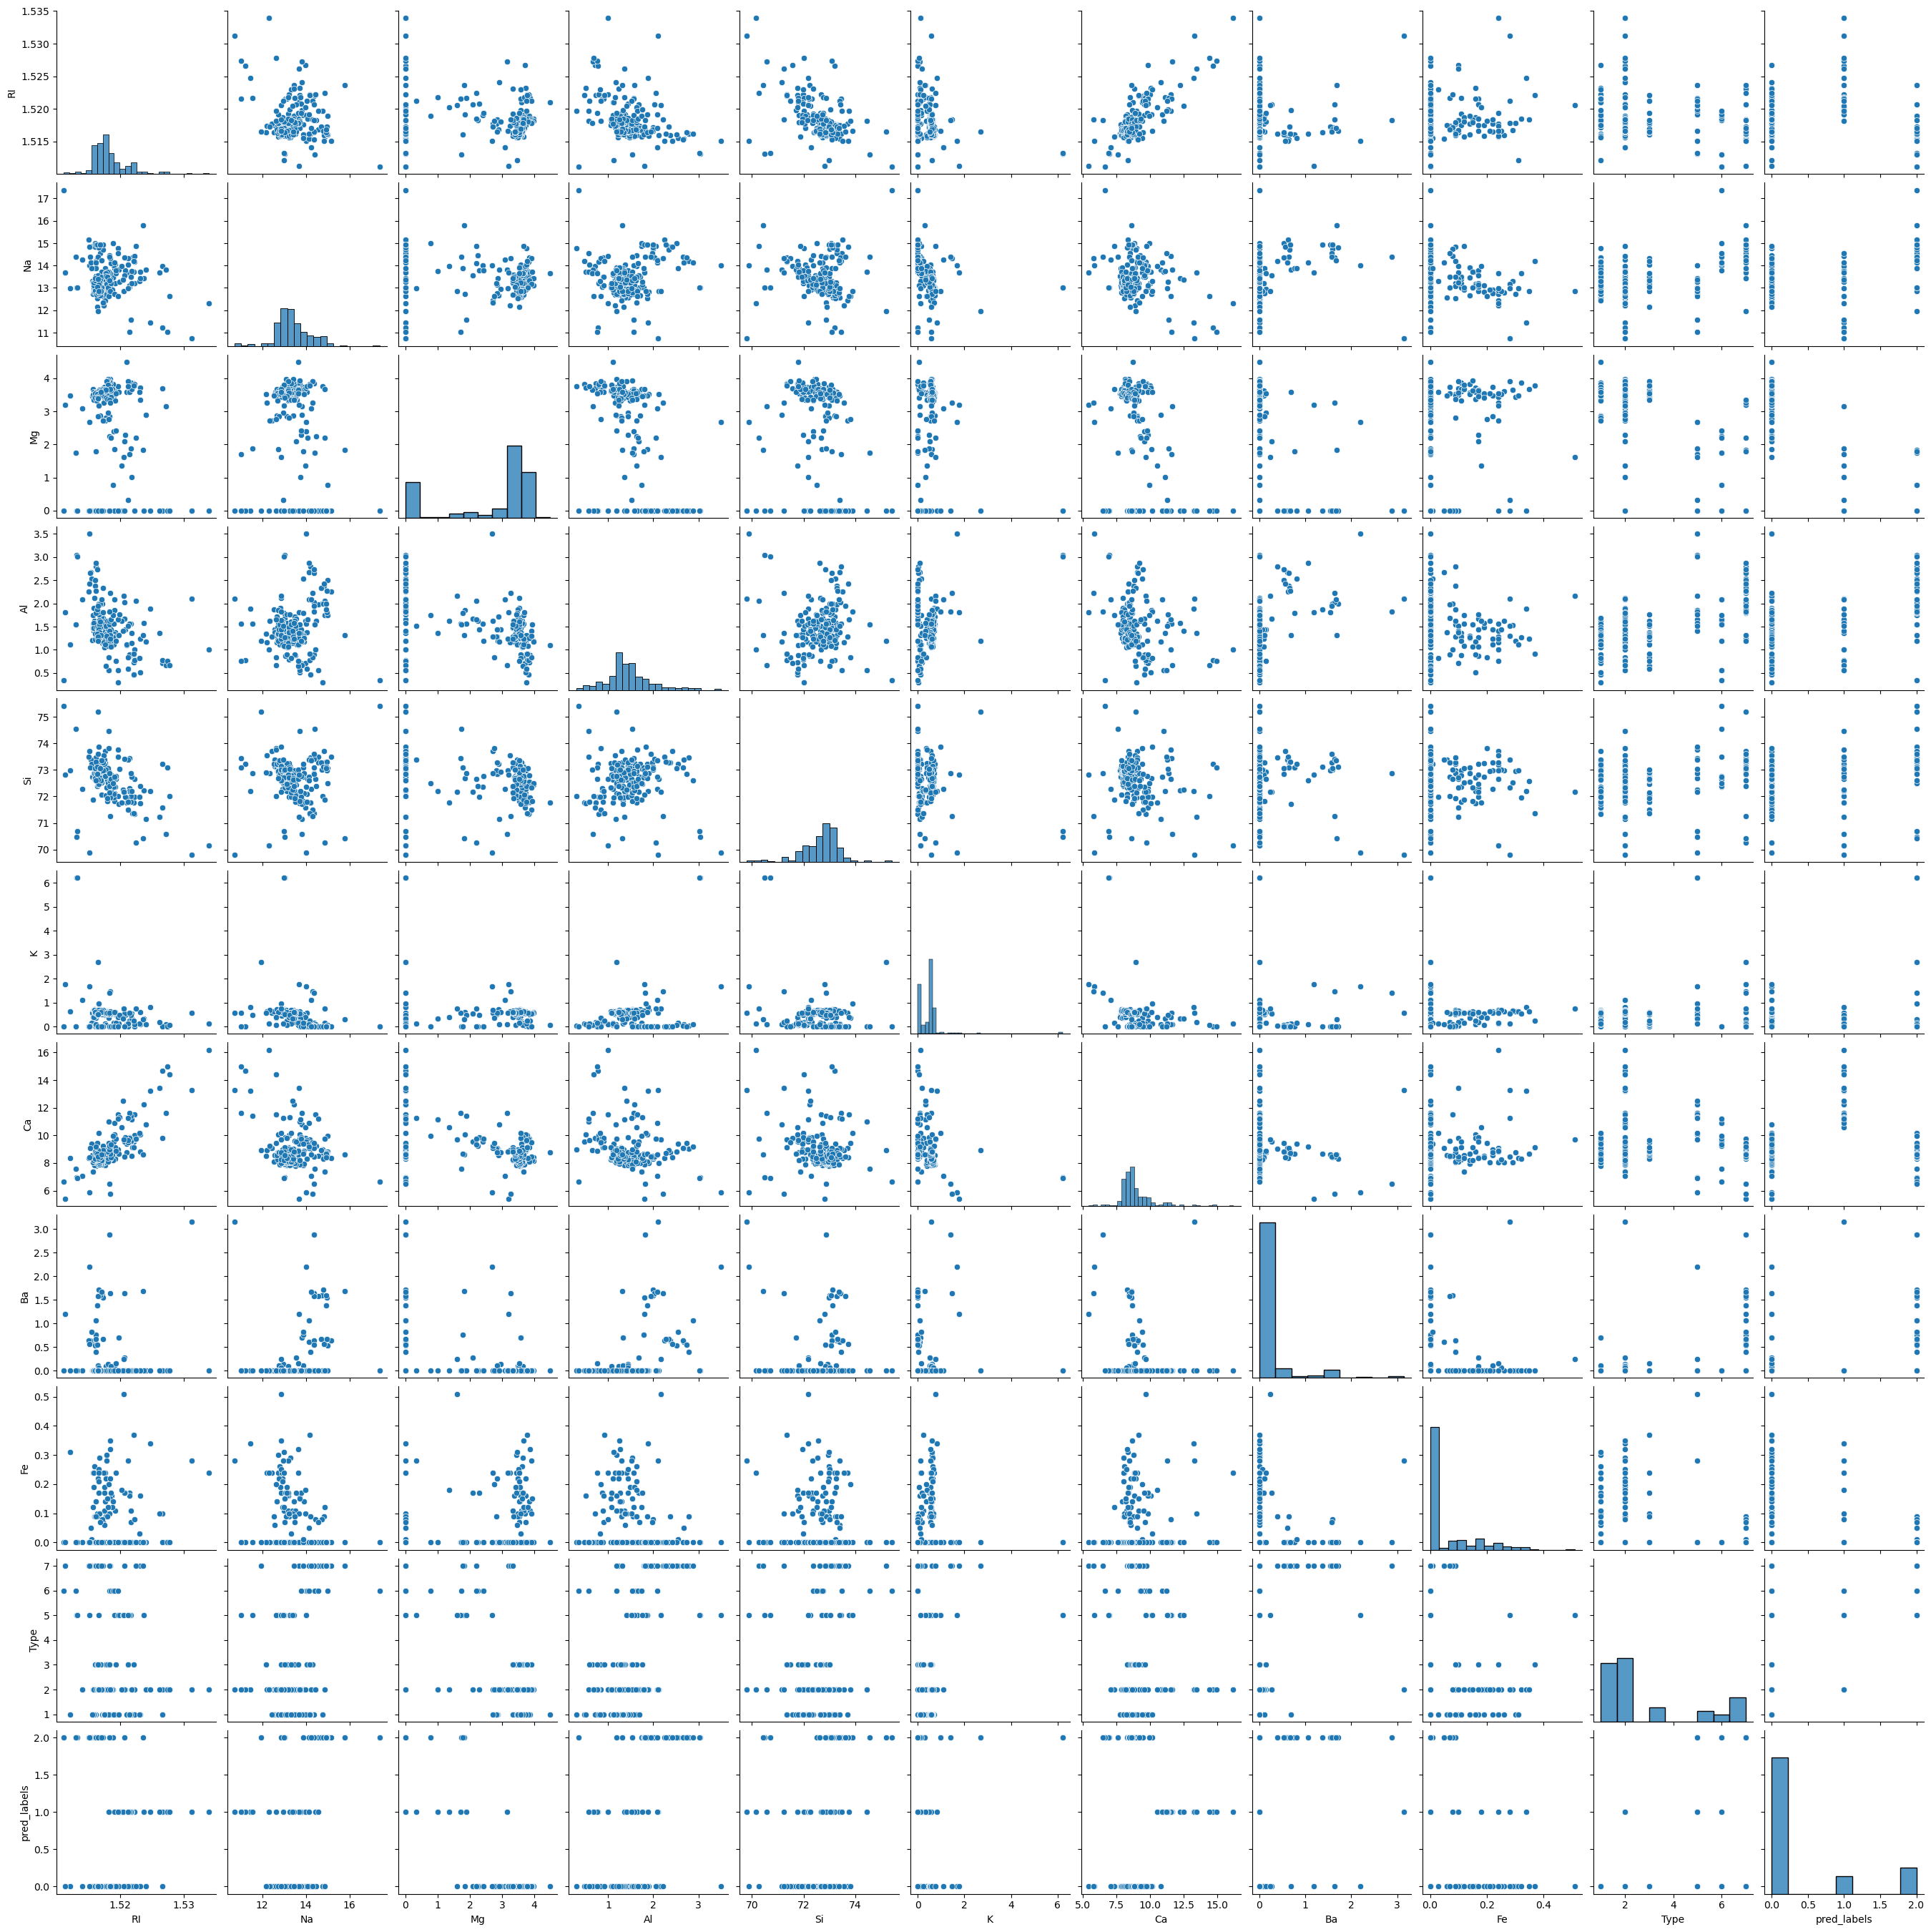

In [23]:
sns.pairplot(df)
plt.show

In [ ]:
# When looking at the pairplots it is hard to see much of a trend or correlation between 
# any of the variables even when there was a higher correlation score between the two.  They 
# are all in random clusters or are a vertical line with some outliers.

Text(0, 0.5, 'Type')

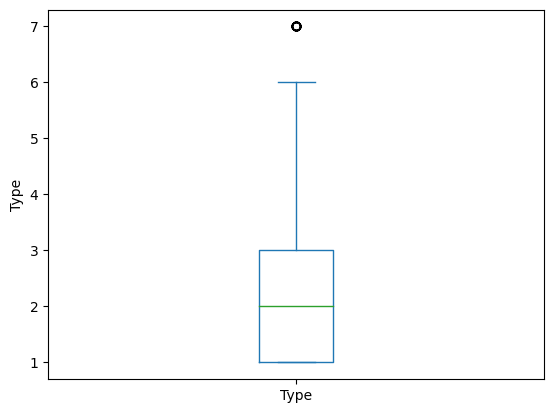

In [24]:
ax = df["Type"].plot.box()
ax.set_ylabel("Type")

In [ ]:
# This boxplot shows how the distribution of the types are very skewed toward 
# the first couple of types (1-3) and there are few kinds of 4-7.  So little so that
# it considers type 7 an outlier.

In [26]:
df3=df.drop(["RI"],axis = 1)

In [27]:
df3.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred_labels
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [ ]:
# We dropped the refractive index because the refractive index does not effect does not 
# predict any part of the type of glass that was used.

In [62]:
x = df3.drop(["Type"], axis=1)
y = df3["Type"]

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [71]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma": [0.001,0.01,0.1,1],
    "degree":[1,2,3],
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6844897959183673
SVC(C=1000, degree=1, gamma=1, kernel='poly')
{'C': 1000, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}


In [72]:
svc = SVC(C=1000,degree = 1, gamma = 1, kernel = 'poly')
svc.fit(x_train_scaled, y_train)

print(svc.score(x_train_scaled,y_train))

y_pred_svc = svc.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_pred_svc))

0.8053691275167785
0.6615384615384615


In [73]:
print(metrics.confusion_matrix(y_pred_svc, y_test))
print(metrics.classification_report(y_pred_svc,y_test))

[[15  2  5  0  1  0]
 [ 3 16  6  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  1  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  1  1  9]]
              precision    recall  f1-score   support

           1       0.83      0.65      0.73        23
           2       0.84      0.62      0.71        26
           3       0.00      0.00      0.00         0
           5       0.50      0.50      0.50         2
           6       0.33      0.67      0.44         3
           7       1.00      0.82      0.90        11

    accuracy                           0.66        65
   macro avg       0.58      0.54      0.55        65
weighted avg       0.83      0.66      0.73        65



C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The model score is a 0.81 which is alright but it could be better (in many models they
#score a 1.0).  Because the model score is lower I suspected that the accuracy score of the model
# build would be much lower.  The accuracy score is 0.66 which is low but I expected this.  The 
# thing that is getting misclassified the most is type 1 and 2.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

grid_params = {
    "n_estimators":[100,150,200,250,300,350,400],
    "max_features":["sqrt","log2"],
    "max_depth": [4,6,8,12],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7850340136054422
RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=200)
{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}


In [32]:
rf = RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=200)
rf.fit(x_train_scaled, y_train)
print(rf.score(x_train_scaled, y_train))

0.9328859060402684


In [33]:
from sklearn import metrics

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

0.6461538461538462
[[14  5  0  0  0  0]
 [ 4 15  0  1  0  0]
 [ 6  3  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 1  0  0  0  2  1]
 [ 1  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.54      0.74      0.62        19
           2       0.62      0.75      0.68        20
           3       0.00      0.00      0.00         9
           5       0.75      1.00      0.86         3
           6       1.00      0.50      0.67         4
           7       0.89      0.80      0.84        10

    accuracy                           0.65        65
   macro avg       0.63      0.63      0.61        65
weighted avg       0.58      0.65      0.60        65



C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The model score was pretty high at 0.933 however the accuracy score was lower at 0.646.
# Even though the model score was higher, the accuracy score is lower.  This surprised me a lot.
# Type 3 was completely misclassified with not a single one classified correctly.

In [35]:
from sklearn.neural_network import MLPClassifier
grid_params = {
    "activation":["logistic","relu"],
    "hidden_layer_sizes":[(10,),(20,),(20,20),(30,),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[5000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

In [36]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.7178231292517007
MLPClassifier(activation='logistic', alpha=0.005, hidden_layer_sizes=(10,),
              max_iter=5000)
{'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (10,), 'max_iter': 5000}


In [37]:
mlp = MLPClassifier(activation='logistic', alpha=0.005, hidden_layer_sizes=(10,),
              max_iter=5000)
mlp.fit(x_train_scaled, y_train)
print(mlp.score(x_train_scaled, y_train))

0.8187919463087249


In [38]:
y_pred_mlp = mlp.predict(x_test_scaled)
print(metrics.accuracy_score(y_test,y_pred_mlp))
print(metrics.confusion_matrix(y_test, y_pred_mlp))
results = metrics.classification_report(y_test, y_pred_mlp)
print(results)

0.5846153846153846
[[11  8  0  0  0  0]
 [ 4 16  0  0  0  0]
 [ 4  5  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  0  0  0  1  2]
 [ 0  1  0  1  0  8]]
              precision    recall  f1-score   support

           1       0.55      0.58      0.56        19
           2       0.52      0.80      0.63        20
           3       0.00      0.00      0.00         9
           5       0.67      0.67      0.67         3
           6       1.00      0.25      0.40         4
           7       0.80      0.80      0.80        10

    accuracy                           0.58        65
   macro avg       0.59      0.52      0.51        65
weighted avg       0.53      0.58      0.54        65



C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The model score is 0.82 which is lower so I expect the accuracy score to be lower as well.
#The accuracy score is 0.58 which is low. I expected this because the model score was already low.
# Once again the third type was never classified correctly.

In [47]:
x2 = df3.drop(["Type"], axis = 1)
y2 = df3["Type"]

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x2,y2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_bal,y_bal,test_size = 0.3)
scaler = StandardScaler()
x_train_scaled3 = scaler.fit_transform(x_train3)
x_test_scaled3 = scaler.transform(x_test3)

In [58]:
from sklearn.svm import SVC

grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100,1000],
    "gamma":[0.001,0.01,0.1,1],
    "degree":[1,2,3]
}

gs= GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)
print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8306001293128785
{'C': 1000, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, degree=1, gamma=0.01)


In [60]:
svc = SVC(C = 1000, degree = 1, gamma = 0.01, kernel = 'rbf')
svc.fit(x_train_scaled3, y_train3)

print(svc.score(x_train_scaled3,y_train3))

y_pred_svc = svc.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3,y_pred_svc))

0.8996865203761756
0.7883211678832117


In [61]:
print(metrics.confusion_matrix(y_pred_svc, y_test3))
print(metrics.classification_report(y_pred_svc,y_test3))

[[12  6  4  0  0  0]
 [ 2 10  1  1  0  0]
 [ 8  4 17  0  0  3]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 24  0]
 [ 0  0  0  0  0 16]]
              precision    recall  f1-score   support

           1       0.55      0.55      0.55        22
           2       0.50      0.71      0.59        14
           3       0.77      0.53      0.63        32
           5       0.97      1.00      0.98        29
           6       1.00      1.00      1.00        24
           7       0.84      1.00      0.91        16

    accuracy                           0.79       137
   macro avg       0.77      0.80      0.78       137
weighted avg       0.80      0.79      0.78       137



In [ ]:
# The model score increased to 0.90 which is better than the original SVC score.  This created
# a better accuracy score with a score of 0.79.  This si much better than before.
# This model has worked the best for identifying type 3 glass which explains the 
# increase in model accuracy scores.

In [50]:
grid_params = {
    "n_estimators":[100,150,200,250,300,350,400],
    "max_features":["sqrt","log2"],
    "max_depth": [4,6,8,12],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8621054487744666
RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=350)
{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 350}


In [57]:
rf = RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=350)
rf.fit(x_train_scaled3, y_train3)
print(rf.score(x_train_scaled3, y_train3))
print("------")
y_pred_rf = rf.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3, y_pred_rf))

cm = metrics.confusion_matrix(y_test3, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test3, y_pred_rf)
print(results)

1.0
------
0.8905109489051095
[[17  1  4  0  0  0]
 [ 4 13  2  1  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0 24  0]
 [ 1  0  2  0  0 16]]
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        22
           2       0.93      0.65      0.76        20
           3       0.73      1.00      0.85        22
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        24
           7       1.00      0.84      0.91        19

    accuracy                           0.89       137
   macro avg       0.90      0.88      0.88       137
weighted avg       0.90      0.89      0.89       137



In [ ]:
# The hyperparameters have changed and as a result the model score changed to 1.0 and the 
# accuracy score changed to 0.89.  This is the best accuracy score we have seen so far.
# The type 6 glass was modeled correctly each time and was never misclassified.

In [54]:
grid_params = {
    "activation":["logistic","relu"],
    "hidden_layer_sizes":[(10,),(20,),(20,20),(30,),(20,20,20)],
    "alpha":[0.0001,0.005,0.01],
    "max_iter":[5000]
}

gs = GridSearchCV(
    MLPClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled3, y_train3)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8306589078939636
MLPClassifier(hidden_layer_sizes=(30,), max_iter=5000)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'max_iter': 5000}


In [55]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(30,),
              max_iter=5000)
mlp.fit(x_train_scaled3, y_train3)
print(mlp.score(x_train_scaled3, y_train3))

0.9435736677115988


In [56]:
y_pred_mlp = mlp.predict(x_test_scaled3)
print(metrics.accuracy_score(y_test3,y_pred_mlp))
print(metrics.confusion_matrix(y_test3, y_pred_mlp))
results = metrics.classification_report(y_test3, y_pred_mlp)
print(results)

0.8540145985401459
[[15  1  6  0  0  0]
 [ 4 11  4  1  0  0]
 [ 0  0 22  0  0  0]
 [ 0  1  0 29  0  0]
 [ 0  0  0  0 24  0]
 [ 1  0  2  0  0 16]]
              precision    recall  f1-score   support

           1       0.75      0.68      0.71        22
           2       0.85      0.55      0.67        20
           3       0.65      1.00      0.79        22
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        24
           7       1.00      0.84      0.91        19

    accuracy                           0.85       137
   macro avg       0.87      0.84      0.84       137
weighted avg       0.87      0.85      0.85       137



In [ ]:
# The MLP classifcation parameters did change as well.  It increased the model score 
# to 0.94 and the accuracy score increased to 0.85.

In [ ]:
# The best scoring model was the balanced (using SMOTE) and hyperparameter tuned 
# Random Forest Classifier.  It was the only one that scored a 1.0 on the model score.
# It comes to no surprise that this was the model then had in turn the highest accuracy score.
# The model was able to correctly classify type 6 glass every time.  With an accruacy score of 
# 0.89 there are some things that could be improved upon that would require a deeper look
# into the data itself.  And more preproccessing regulations.  It could also score slightly lower
# based on how the data was split into the testing and training sets.